# Лабораторная работа 5

# Анимация качения треугольника Рело по квадрату

## Кандидатов Егор Олегович, 10.04.2025

### Задание 5.1. Начальное положение треугольника Рело и квадрата

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

In [3]:
%pip list | findstr ipympl

ipympl                          0.9.7
Note: you may need to restart the kernel to use updated packages.


In [4]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)

In [5]:
vertexes = np.array([
    [-r/2, -r/2],
    [ r/2, -r/2],
    [ r/2,  r/2],
    [-r/2,  r/2],
    [-r/2, -r/2]
])
square_points = []

In [6]:
for i in range(4):
    start = vertexes[i]
    end = vertexes[i + 1]
    x_vals = np.linspace(start[0], end[0], N)
    y_vals = np.linspace(start[1], end[1], N)
    for x, y in zip(x_vals, y_vals):
        square_points.append([x, y])
square = np.array(square_points)

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

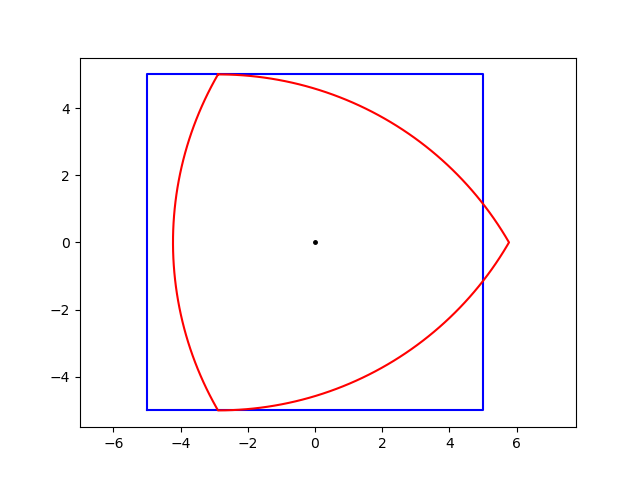

In [9]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

In [10]:
shift=[r/(3**(1/2))-r/2,0]
relo_matrix_shifted = relo_matrix - shift
center -= shift

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

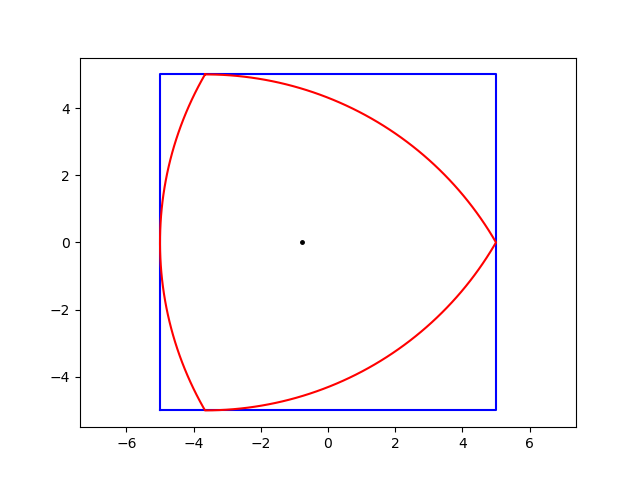

In [11]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

### Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

In [13]:
N_frames = 100

In [14]:
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

In [19]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

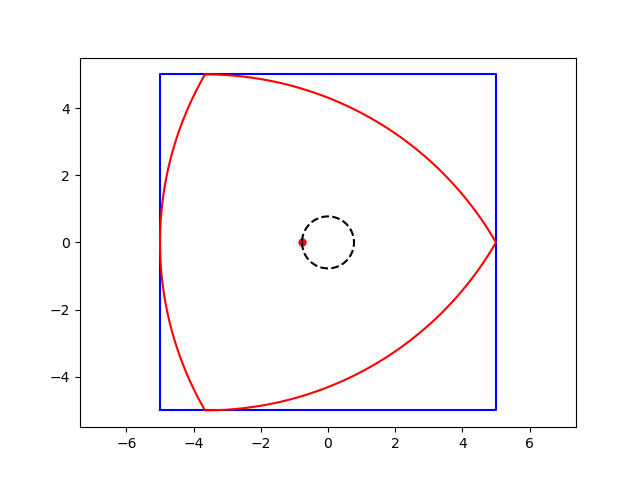

In [20]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [28]:
center_frame[0]

array([-7.73502692e-01, -9.47267596e-17])

In [30]:
def draw_frame(r, N_frames, frame=0):
    """ изображает кадр с номером frame при поступательном движении центра треугольника Рело по окружности против часовой стрелки"""
    shift=[r/(3**(1/2))-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

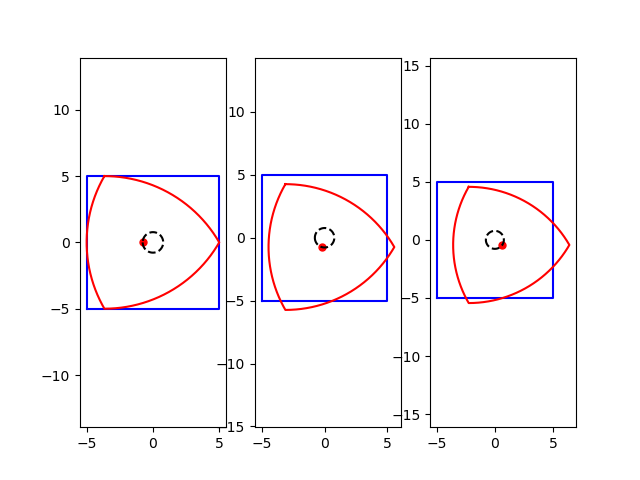

In [32]:
plt.figure()
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

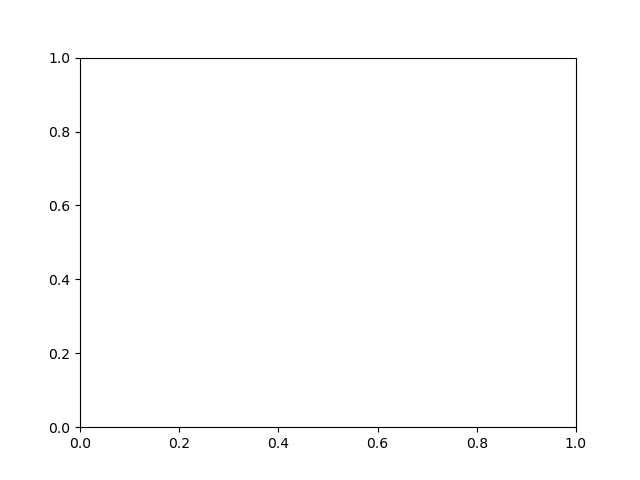

In [34]:
def at_frame2(frame):
    ax2.clear()  # Очищаем ось перед отрисовкой нового кадра
    draw_frame(r=r, N_frames=N_frames, frame=frame)  
fig2 = plt.figure()
ax2 = plt.axes()
FuncAnimation(fig2, at_frame2, frames=N_frames, 
repeat=False, interval=20)

In [36]:
plt.close("all")

### Задание 5.3. Анимация качения треугольника Рело

In [39]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [41]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

(-6.3508529610858835, 6.350852961085886, -5.500000000000005, 5.500000000000001)

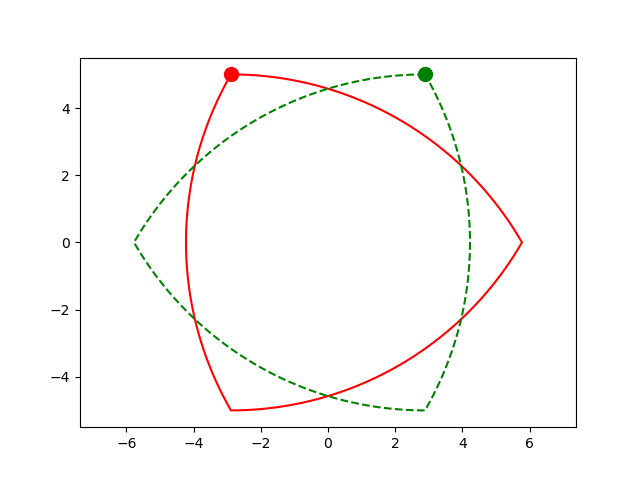

In [43]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [45]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

(-5.501735269668723, 5.536440663043177, -5.5002878716042405, 5.506045303689057)

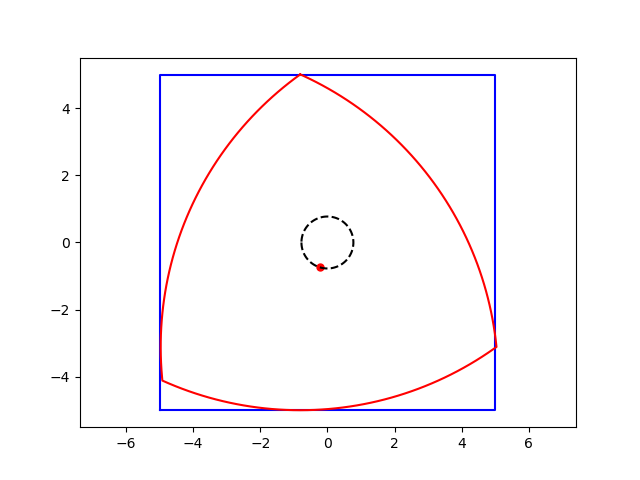

In [47]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [49]:
def draw_frame(r, N_frames, frame=0):
    square=np.array([
    [-r/2, -r/2],
    [ r/2, -r/2],
    [ r/2,  r/2],
    [-r/2,  r/2],
    [-r/2, -r/2]
])
    center=np.array([0.,0.])
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N_frames)
    shift=[r/(3**(1/2))-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
     + center_frame[frame])
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

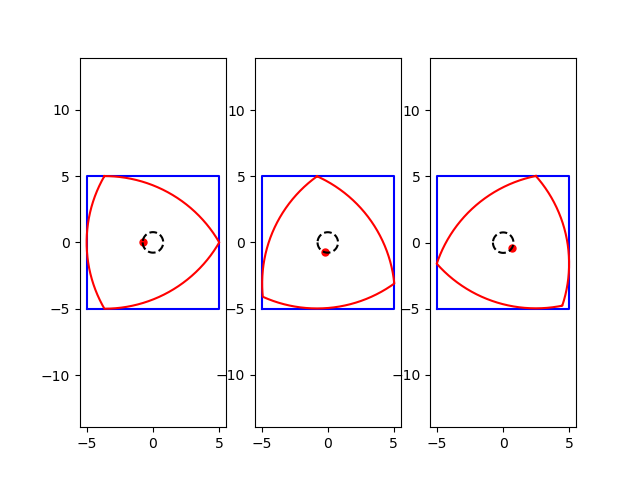

In [51]:
plt.figure()
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

In [53]:
plt.close('all')

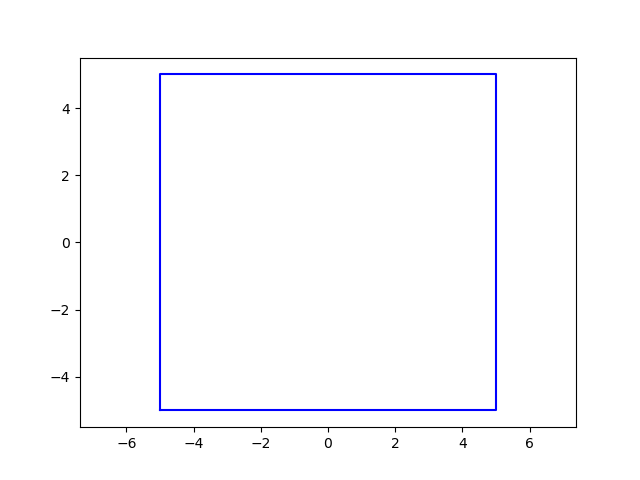

In [57]:
fig2=plt.figure()
ax2 = plt.axes()
plt.axis('equal')
line1, = ax2.plot(square[:,0],square[:,1],'b-') # объект для графика функции
line2, = ax2.plot([], [],'go') # объект для точки
line3,=ax2.plot([],[],'r-')
def at_frame2(frame):
    global center_frame
    point=center_frame[frame]
    line2.set_data([point[0]], [point[1]])
    matrix=rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
     + point)
    line3.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])
def init2():
    line1, = ax2.plot(square[:,0],square[:,1],'b-') # объект для графика функции
    line3,=ax2.plot([],[],'r-')
    line2, = ax2.plot([], [],'go') # объект для точки
    line4,=ax2.plot(center_frame[0,0],center_frame[0,1],'r.',markersize=10)
    line5,=ax2.plot(center_frame[:,0],center_frame[:,1],'k--')
FuncAnimation(fig2, at_frame2, frames=range(N_frames), init_func=init2,repeat=False, interval=20)